<a href="https://colab.research.google.com/github/hannari-python/tutorial/blob/master/library/sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scikit-learnの使い方の紹介

* 参考情報
    * [Scipy lecture notes](https://scipy-lectures.org/packages/scikit-learn/index.html)

## 機械学習とは

* 観測したデータに適合するように調整可能なパラメータを自動的に調整するアルゴリズム
* データベースのようにデータを単純に保存・検索するのではなく、データ間の関係を何らかの方法によって一般化することで知的に振る舞うプログラム

## 機械学習の種類

* 教師あり学習と教師なし学習に大きく分かれる
    * 教師あり学習ではモデル学習時にモデルへの入力サンプルに対する正解データ(=教師データ)が含まれた学習セットを使用
    * 教師なし学習では入力サンプルの集合からそれらのサンプルが持つ特性を抽出

### 教師あり学習

* 分類(`classification`)
    * 何らかの入力を与えた場合に、その入力が属するクラス(カテゴリ)を推定する問題
    * 学習(`training`)フェーズと予測(`prediction`)フェーズに分かれる
        * 学習フェーズでは説明変数(入力変数)と目的変数(入力変数が属するクラス)のペアが複数含まれる学習セットを使用し、モデルを学習
        * 予測フェーズでは属するクラスが未知である説明変数(入力変数)を学習済みのモデルに入力することで、入力変数が属するクラスを予測
* 下図は赤と青の点群を分類するための分類境界(黒の直線)を示した図
    * このような分類境界を自動的に見つけ出すことが分類モデルの役割となる
    * 学習フェーズにおいて学習セットに含まれるサンプル(2次元座標値)からそれらを正しいクラス(青/赤で表現)へと分類するための分類境界(=モデル)を学習
    * 予測フェーズでは学習した分類境界を元に、新規に入力したサンプル(2次元座標値; クラスは未知)に対しそれらが属するクラスを予測

![classification.png](./img/classification.png)

* 回帰(`regression`)
    * 何らかの入力を与えた場合に、その入力に対してターゲットとなる値(出力値)を予測する問題
    * 学習(`training`)フェーズと予測(`prediction`)フェーズに分かれる
        * 学習フェーズでは説明変数(入力変数)と目的変数(出力変数)のペアが複数含まれる学習セットを使用し、モデルを学習
        * 予測フェーズでは学習済みのモデルに入力変数を与えることで出力変数の値を予測
* 下図は青色の点群から学習された青色の直線(モデル)を示した図である
    * 学習セットには青色の点群(座標値)が含まれており、x軸の値からy軸の値を推定するためのモデル(1次式)を学習フェーズにおいて学習
    * 予測フェーズでは学習済みのモデルを用いて、任意のx軸の値を与えた場合のy軸の値を予測

![regression.png](./img/regression.png)

### 教師なし学習

* クラスタリング(`clustering`)
    * 入力データの集合からそれらが形成する複数のクラスタを抽出するための機械学習
        * 似たような特性を持つサンプルが同一のクラスタに属するように集合を分類
        * 例: `k-means`によるハードクラスタリングや`GMM`によるソフトクラスタリング
    * クラスタ数は基本的に処理時に指定するが、クラスタ数を自動推定する手法も存在
* 次元削減(`dimensionality reduction`)
    * 入力データの特徴量の次元数を入力データの集合全体が持つ性質に基づいて削減するための機械学習
        * 例: 主成分分析

---

## scikit-learnにおけるデータ構造

### データ行列

* scikit-learnではデータ(`data`)を`data.shape==(n_samples, n_features)`の2次元配列(`numpy`配列)として表現
    * `n_samples`
        * サンプル数
            * `data[i]`は処理対象となるi番目のサンプルを表す
        * 各サンプルは数値表現可能なものであれば何でも良い(文書、画像、音声、動画、CSVファイルの列など)
    * `n_features`
        * 特徴量の次元数
        * 特徴量
            * 各々のサンプルを特徴づけるための数値データ
                * ex. 人間に対する`[身長、 体重]`のペアの場合は`n_features==2`
                * 一般的には実数だが場合によっては真偽値や離散値であっても良い
            * `data[i][j]`はi番目のサンプルにおけるj番目の特徴量を表す

---

### Iris Datasetによるデータ構造の実例

Iris Datasetはアヤメの種類を分類するためのサンプルとして使われるデータセットである。

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

* `iris.data`に説明変数を表すデータ行列が存在
* `iris.target`に目的変数(クラスラベル)が存在している

In [5]:
print(iris.data.shape)

n_samples, n_features = iris.data.shape
print(n_samples)
print(n_features)

(150, 4)
150
4


150サンプル存在し、次元数が4次元であることが分かる

In [9]:
print(iris.data[0])  # 0サンプル目に格納されている数値データ(4次元)

[5.1 3.5 1.4 0.2]


In [10]:
print(iris.target.shape)
print(iris.target)
print(iris.target_names)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


* 正解データ(クラスラベル)も入力サンプルと同じサンプル数だけ存在している
* クラスラベルは0, 1, 2のいずれか
    * それぞれ`sentosa`, `versicolor`, `virginica`を表す

In [72]:
import pandas as pd
import seaborn as sns

In [29]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [33]:
iris_df["species"] = iris.target_names[iris.target]

In [34]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


各特徴量は下記の表の通りである。

| 特徴量名 | 説明 
|:-- |:-- 
| sepal length | がくの長さ
| sepal width | がくの幅
| petal length | 花弁の長さ
| petal width | 花弁の幅

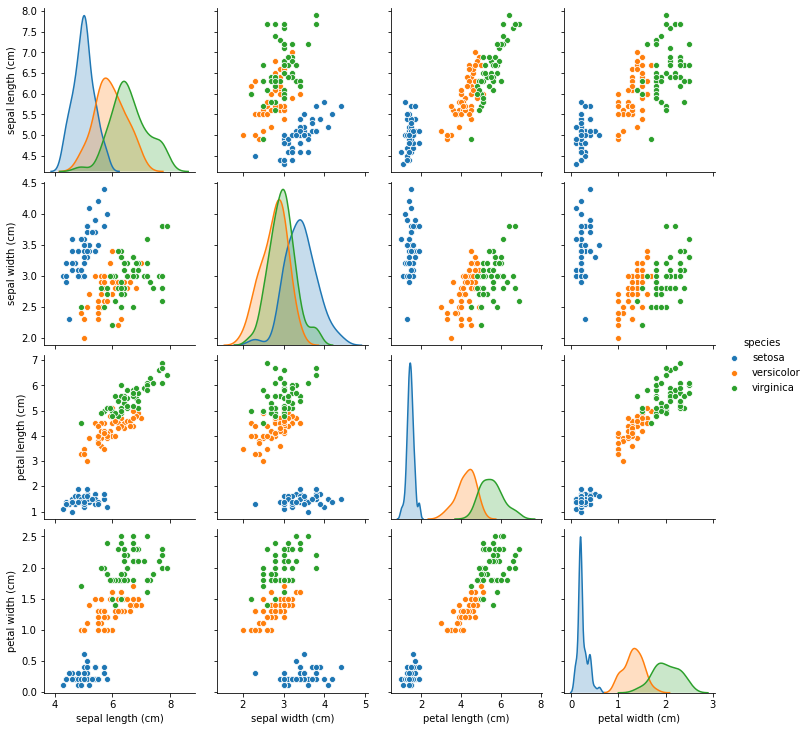

In [78]:
sns.pairplot(iris_df, hue='species')

---

## 分類モデルの実例

`K nearest neighbors(kNN)`は単純な分類器であり、新しいラベル未知の観測データに対し、

* `n_neighbors=1`の場合は既存の学習データの各サンプルのうち最も近いサンプルのラベルを返す
* `n_neighbors=k`の場合は既存の学習データの各サンプルの上位k番目までに近いサンプルにおいて最も多く出現したラベルを返す

In [54]:
X, y = iris.data, iris.target

In [55]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

In [56]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [57]:
x_test = [3, 5, 4, 2]
y_hat = knn.predict([x_test])
print(iris.target_names[y_hat])

['virginica']


knnの代わりに他の分類器のインスタンスを用いることでアルゴリズムを切り替えることが可能となる

---

## 予測モデルの実例

ここでは単純な線形回帰モデルを用いた線形回帰を行う。

$y_{true} = 2x + 1$に$n = 0.01 * N(0, 1)$というガウス雑音が重畳したデータ$y = y_{true} + n$が100サンプル得られた場合に、x軸の値からyの値を予測する問題を考える。

In [20]:
import numpy as np
np.random.seed(1)

n_samples = 100

# (n_samples, 1)のデータ行列
x = np.arange(n_samples)
X = x.reshape(n_samples, 1)

# 真値に正規乱数がノイズとして重畳したターゲット値ベクトルを生成
y_true = 2.0 * np.arange(n_samples) + 1.0
noise = 0.01 * np.random.randn(n_samples)
y = y_true + noise

print(X.shape, X[:10])
print(y_true.shape, y_true[:10])
print(y.shape, y[:10])

(100, 1) [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
(100,) [ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19.]
(100,) [ 1.01624345  2.99388244  4.99471828  6.98927031  9.00865408 10.97698461
 13.01744812 14.99238793 17.00319039 18.9975063 ]


In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

このmodelを用いて$y_{true} = ax + b$におけるa, bを`(x[0], y[0]), (x[1], y[1]), ...`というペアから推測する。

In [22]:
model.fit(X, y)

LinearRegression()

In [23]:
print(f"(a, b) = ({model.coef_}, {model.intercept_})")

(a, b) = ([2.00003342], 0.9989516052066278)


fitの実行によって$\hat{y} = 2.00003342x + 0.9989516052066278$となる予測モデルを学習できたことが分かる。
この学習済みモデルを用いて$x=4,5$の場合のyの値を予測する。

In [19]:
model.predict([[4],
               [5]])

array([ 8.99908528, 10.9991187 ])

knnと同様に他の推定器のインスタンスを用いることでアルゴリズムを切り替えることが可能となる。

---

## scikit-learnのクラスにおけるインタフェース

* scikit-learnに存在する各推定器は共通のインタフェースを持っている
    * 推定器を別のクラスにするだけで容易にアルゴリズムの切り替えが可能となる

### 全推定器に存在

* `model.fit()`
    * 学習データに対してモデルを適応させる
    * 教師あり学習では2引数`(X, y)`を受け付ける(ex. `model.fit(X, y)`)
    * 教師なし学習では1引数`(X)`のみを受け付ける(ex. `model.fit(X)`)

### 教師あり学習の推定器に存在

* `model.predict()`
    * 学習済みのモデルを用いて新しいデータセットに対するラベルや予測値を推定
    * 1引数を受け付け、モデルが予測したラベルまたは予測値の配列を返却(ex, `y_hat = model.predict(X_new)`)
* `model.predict_proba()`
    * 分類問題において一部の推定器に実装されている
    * 入力サンプルが各々のカテゴリラベルに属する確率値を返却する
    * 最も高い確率値を持つラベルが`model.predict()`で返却される
* `model.score()`
    * 分類問題または回帰問題を扱う予測器のほぼ全てに実装されているスコアを返すメソッド
    * 0〜1で表されるスコアを返し、高いスコアほどよいフィッティングを表す

### 教師なし学習の推定器に存在

* `model.transform()`
    * fitting済みの教師なし学習用モデルを用いて入力データを新しい基底へと変換する
    * 1引数のみを受け付け新しい基底上で表現される変換後のデータ表現を返す(ex. `X_trans = model.transform(X_new)`)
* `model.fit_transform()`
    * 教師なし学習を行う一部の推定器に実装されている
    * 入力データに対する`fit()`と`transform()`を同時に実行する
        * ex. 次元削減を行うモデルでの`X_new_dim = model.fit_transform(X_old_dim)`

---

## どの推定器を使うべきか

[Choosing the right estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)を参照するのが良い。

![cheatsheet.png](./img/sklearn_cheatsheet.png)